In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
data = pd.read_csv("data/total_add_velocity_bilinear_interpolation.csv")

In [3]:
reg = data.copy()
reg = reg.iloc[:,4:10]

In [4]:
correlation_matrix = reg.corr()

In [5]:
correlation_matrix

,water_u,water_v,wind_u,wind_v,d_long,d_lati
water_u,1.000000,0.018969,0.518147,0.284320,0.536471,0.052801
water_v,0.018969,1.000000,-0.330510,0.478506,0.035853,0.568273
wind_u,0.518147,-0.330510,1.000000,-0.027035,0.130175,-0.055455
wind_v,0.284320,0.478506,-0.027035,1.000000,0.097053,0.125388
d_long,0.536471,0.035853,0.130175,0.097053,1.000000,0.061713
d_lati,0.052801,0.568273,-0.055455,0.125388,0.061713,1.000000


C:\Users\lg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


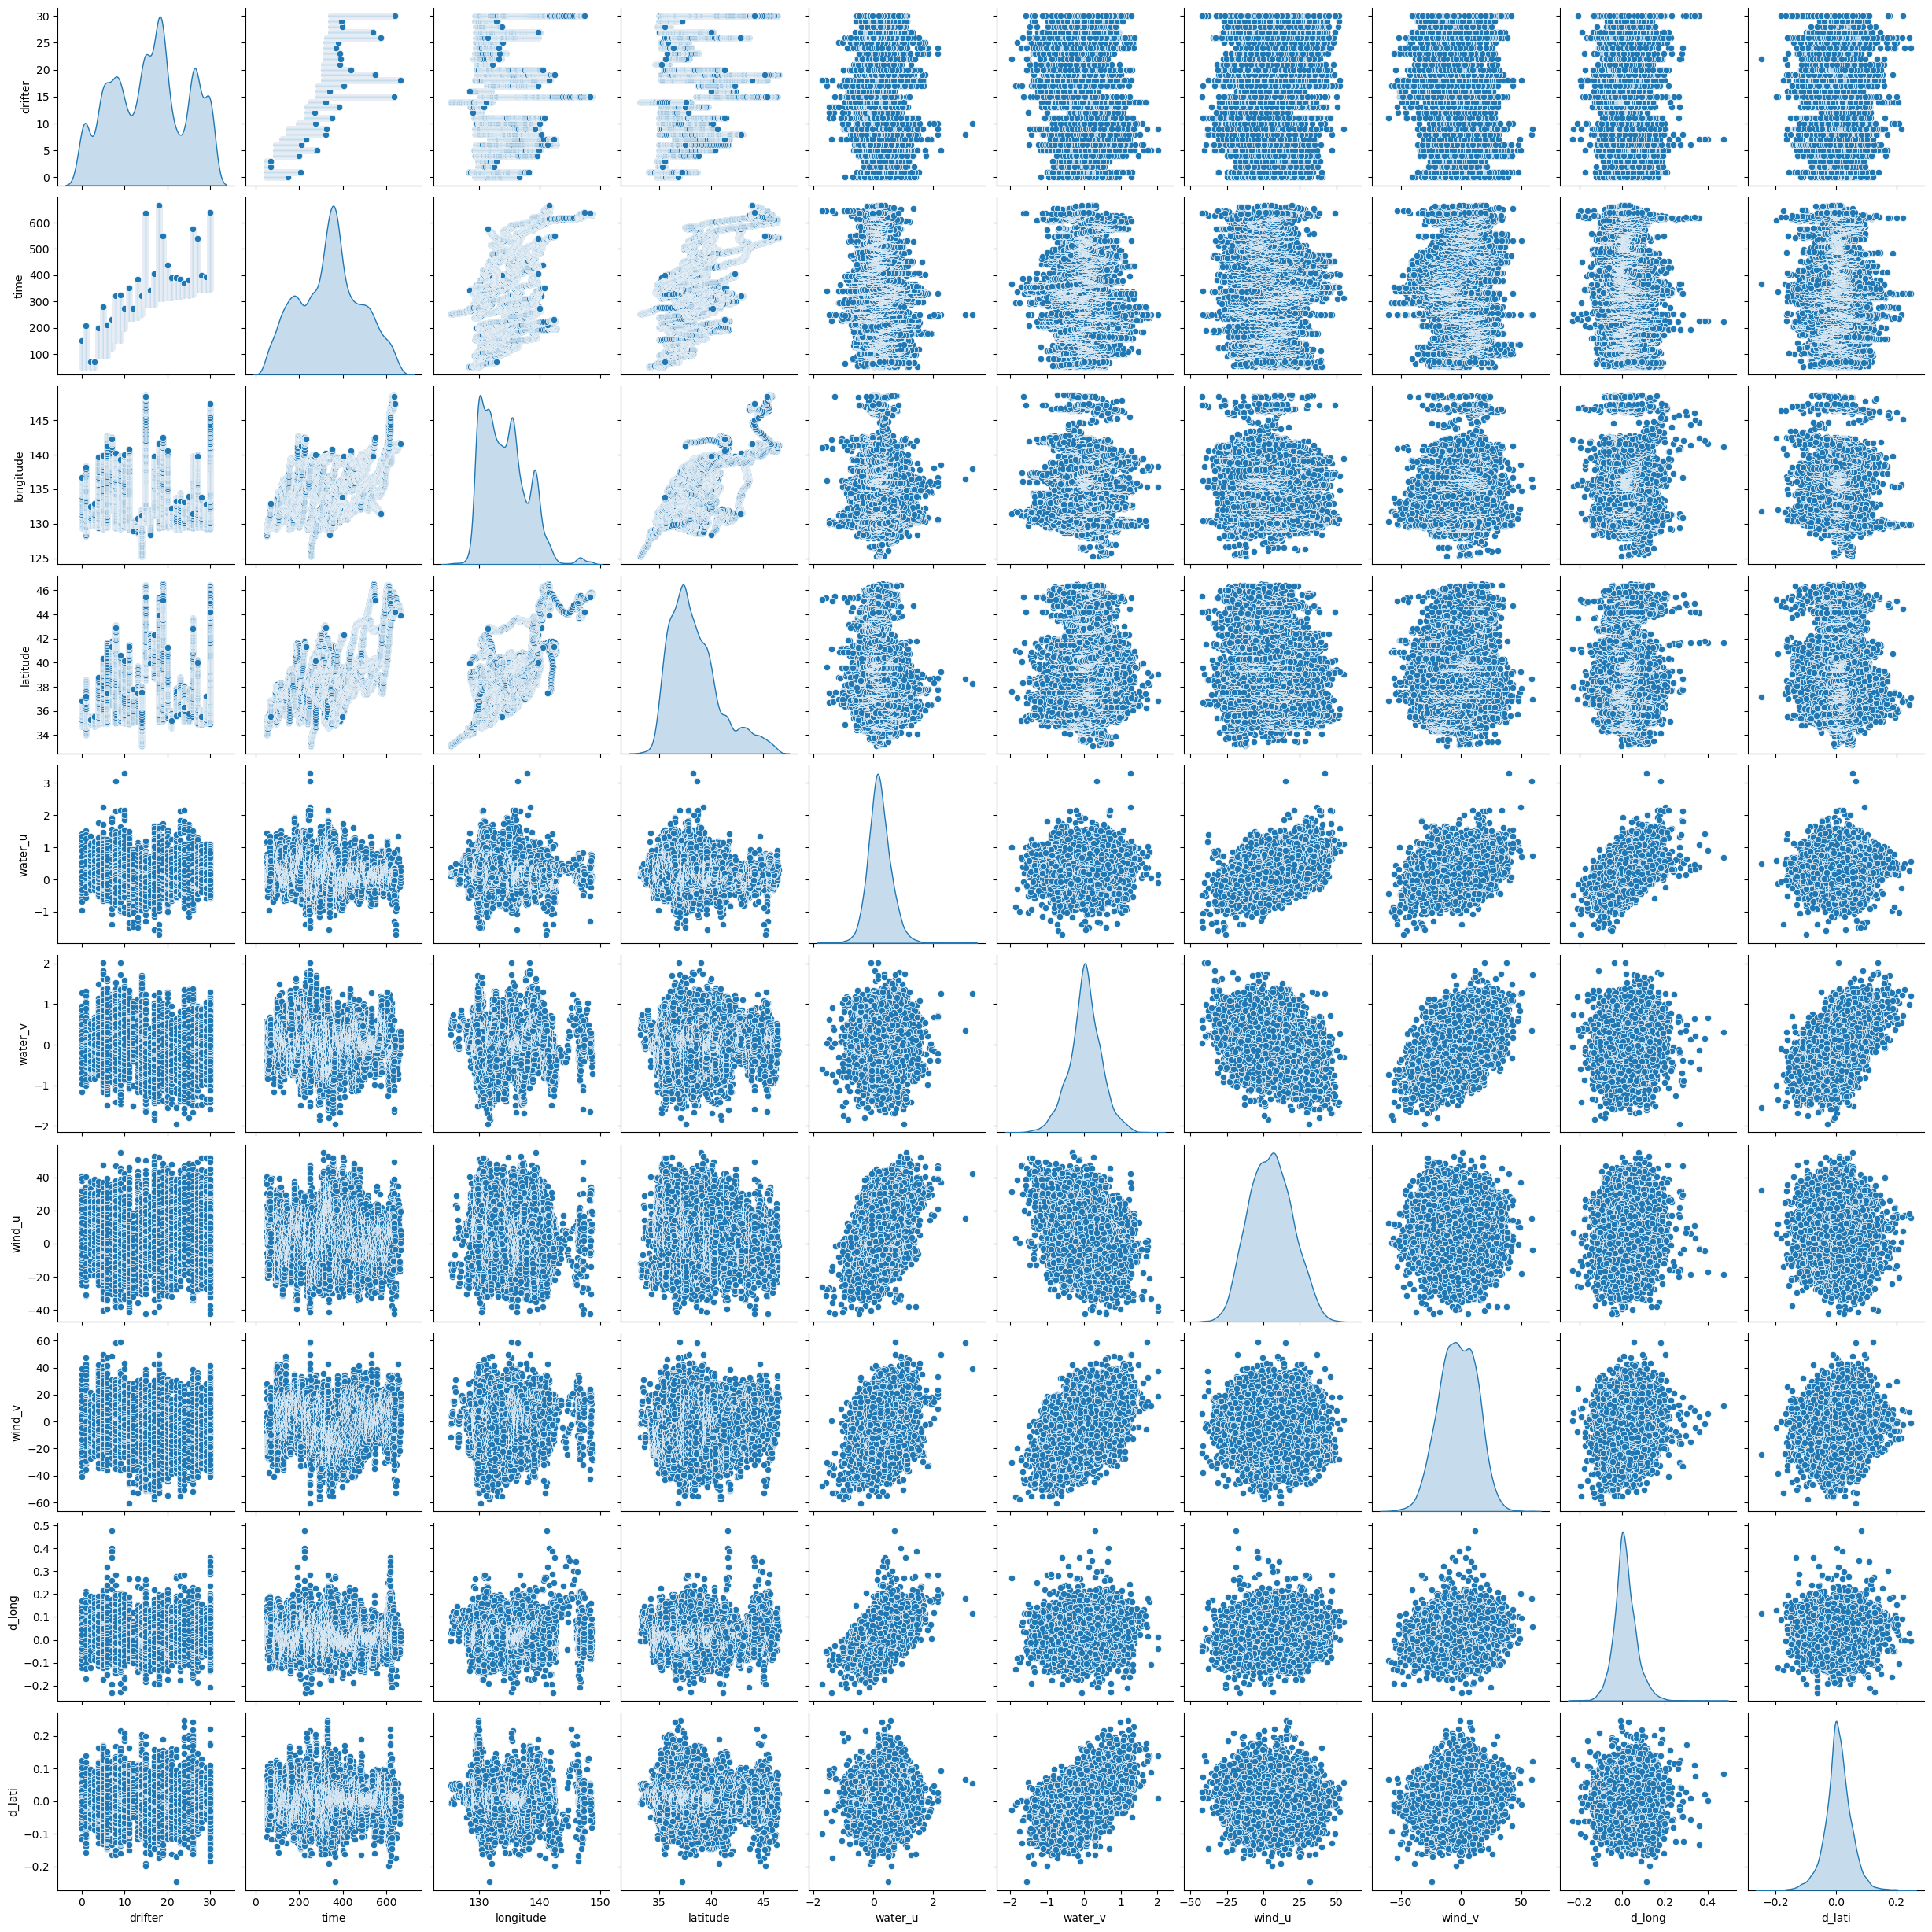

In [6]:
# pair plot
sns.pairplot(data, diag_kind='kde')
plt.show()

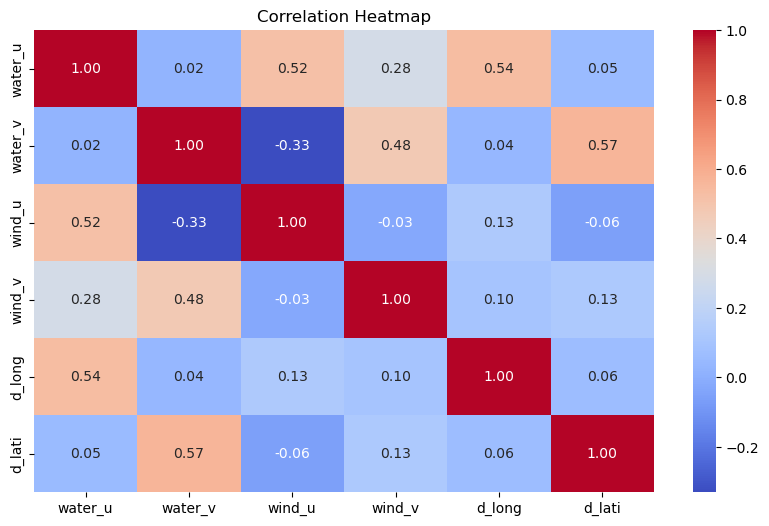

In [7]:
# heat map
plt.figure(figsize=(10, 6))  # 그림의 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# d_long

In [8]:
X = reg[['water_u', 'water_v', 'wind_u', 'wind_v']]
y_long = reg['d_long']

In [9]:
X_long = sm.add_constant(X)
model_long = sm.OLS(y_long, X_long).fit()

In [10]:
print(model_long.summary())

                            OLS Regression Results                            
Dep. Variable:                 d_long   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     1921.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:29:39   Log-Likelihood:                 26999.
No. Observations:               15814   AIC:                        -5.399e+04
Df Residuals:                   15809   BIC:                        -5.395e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.000     -3.224      0.0

# d_lati

In [11]:
X = reg[['water_u', 'water_v', 'wind_u', 'wind_v']]
y_lati = reg['d_lati']

In [12]:
X_lati = sm.add_constant(X)
model_lati = sm.OLS(y_lati, X_lati).fit()

In [13]:
print(model_lati.summary())

                            OLS Regression Results                            
Dep. Variable:                 d_lati   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     2416.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:29:39   Log-Likelihood:                 30858.
No. Observations:               15814   AIC:                        -6.171e+04
Df Residuals:                   15809   BIC:                        -6.167e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.144e-05      0.000     -0.276      0.7

# RMSE

In [14]:
def calculate_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [15]:
y_long_pred = model_long.predict(X_long)
y_lati_pred = model_lati.predict(X_lati)

rmse_long = calculate_rmse(y_long, y_long_pred)
rmse_lati = calculate_rmse(y_lati, y_lati_pred)

print(f"RMSE for d_long: {rmse_long:.4f}")
print(f"RMSE for d_lati: {rmse_lati:.4f}")

RMSE for d_long: 0.0439
RMSE for d_lati: 0.0344
